In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## El proyecto está orientado a la utilización de herramientas de machine learning para la predicción/estimación de precios de diamantes según sus características obtenidas a partir de datos estadísticos.

In [2]:
def get_dataset():
    return pd.read_csv('diamonds.csv')
    # return pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

diamonds = get_dataset()
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Características de los diamantes**
Las cuatro características que determinan el valor de los diamantse son las llamadas “4C´s” y son:  Carat (peso o quilataje), Color, Clarity (pureza) y Cut (talla) a la que se añadiría un último factor que sería la fluorescencia.

1. **PESO (CARAT):**
    El peso de un diamante se mide en quilates (1 qt = 0,20 gramos), y es el factor más determinante para estimar el precio de un diamante. Los dos conceptos claves a tener en cuenta respecto al precio son:
    - El precio de los diamantes aumenta exponencialmente respecto al peso, así un diamante de un quilate no vale el doble que un diamante de medio quilate sino aproximadamente el cuádruple.
    - La cotización de los diamantes se determina por bloques, por lo que un diamante de 0,49 quilates pese a ser visualmente casi idéntico a uno de 0,50 quilates será más barato, al pertenecer al bloque de cotización 0,40 – 0,49 quilates en vez de al de 0,50 – 0,59 quilates.
#####
2. **COLOR (COLOR):**
    El color de un diamante influye enormemente en la belleza y en el precio del mismo. Cuanto más incoloro, mejor calidad.
    -  La escala de colores más usada hoy en día es la del laboratorio gemológico G.I.A. que es la que se utiliza en la mayor parte de las joyerías. Esta escala ordena el color de los diamantes por orden alfabético desde la letra D (incoloro perfecto), hasta la Z (amarillo o marrón).
    - Las esquivalencias entre las distintas escalas serían las siguientes:
        - Colores D y E – River – Blanco Excepcional 
        - Color G y F – Top Wesselton – Blanco Extra
        - Color H – Wesselton – Blanco
        - Colores J e I – Top Crystal – Blanco con ligero color
        - Colores K y L – Crystal – Ligero color
        - Colores Z – M – Cape, light yellow y yellow – Color
#####
3. **PUREZA (CLARITY):**
    Los diamantes se forman durante miles de años bajo una enorme presión y temperatura. Ese proceso deja en los diamantes unas inclusiones que determinan su pureza en el diamante. Cuanto más puro es un diamante, más cantidad de luz recibe y refleja, produciendo una mayor cantidad de brillo que los diamantes de menor pureza.
    - El grado de pureza de un diamante se determina según el número, tamaño y posición de sus marcas externas e inclusiones, usando una lupa de 10 aumentos (10X), y la escala de pureza más usada, del laboratorio gemológico G.I.A., se divide en 11 grados que van, desde el mayor grado de pureza (FL o Flawless) al grado I (inclusiones visibles a simple vista, también denominado piqué). Las categorías serían las siguientes:
        - F y IF para diamantes completamente puros
        -  VVS1 y VVS2, que significa Very, very Slightly Included para diamantes con imperfecciones casi inapreciables
        - VS1 y VS2, que significa Very Slightly Included
        -  SI1 y SI2, que significa Slightly Included
        - I1, I2 e I3, para diamantes con inclusiones visibles a simple vista también llamados piqué o picados.
    De estas categorías conviene descartar los diamantes picados llamados I1, I2 e I3 y en cuanto al resto de categorías dependerá de la capacidad económica, pero lógicamante cuanto más puro mejor.
##### 
4. **TALLA (CUT):**
    - La talla influye en el precio de dos maneras: Por un lado el tipo de talla y por otro la calidad de la talla.
    - Aunque hay muchas tallas posibles, la más común por sacar todo el partido posible de los diamantes es la talla brillante (la que todo el mundo imagna al pensar en un diamante), que también es generalmente la más cara. Ejemplos de otras tallas también muy populares serían la princesa, oval, corazón, esmaralda, pera, o cojín.
    - En cuanto a la calidad de la talla este es un aspecto clave para tener un diamante que brille y no siempre se le presta la suficiente atención.Diamantes con buena simetría y proporcionados siempre reflejarán mejor la luz y brillarán mucho más. La escala que se utiliza hoy en día incluye los siguientes grados: Excellent, Very Good, Good, Fair y Poor. Siendo en general los diamantes Excellent y Very Good los que deberíamos comprar para tener una piedra con una buena reflexión.

Primero se observarán las características generales del Data Set

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


El Data Set está compuesto por 10 columnas donde los ningún valor es nulo. Ahora a analizar si existen valores repetidos.

In [4]:
# Evaluar el Data Frame en una serie de bool
diamonds[diamonds.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


En el Data Set hay 146 filas con valores repetidos. Para este caso se procede a descartar estas filas.

In [5]:
diamonds = diamonds.drop_duplicates()

Una vez descartados los valores repetidos del DataFrame se procede a visualizar las descripción de los atributos numéricos del Data Set

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Salta a la vista que hay filas con atributos 'x', 'y', y 'z' con valores mínimos 0 y con valores máximos muy elevados, lo cual podrían falsear el modelo a obtener para la predicción/estimación. Estas filas con dichos valores también serán descartadas.

In [7]:
print(diamonds[(diamonds['x']==0)|(diamonds['y']==0)|(diamonds['z']==0)],end="\n\n")
diamonds[(diamonds['y']>15)|(diamonds['z']==15)]

       carat        cut color clarity  depth  table  price     x     y    z
2207    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2314    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4791    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5471    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10167   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13601   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24394   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26123   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26243   1.20

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [8]:
# Eliminando las filas con atributos no deseados
diamonds.drop(diamonds[(diamonds['x']==0)|(diamonds['y']==0)|(diamonds['z']==0)|(diamonds['y']>15)|(diamonds['z']==15)].index, inplace=True)

Una vez filtrados los datos dejando fuera los que pudieran falsear el análisis y el modelo se procede a realizar la correlación de los datos.

In [9]:
diamonds[['x','y','z','carat','table','depth','price']].corr()

,x,y,z,carat,table,depth,price
x,1.000000,0.998654,0.975616,0.977856,0.195459,-0.025148,0.887128
y,0.998654,1.000000,0.975293,0.976940,0.189276,-0.028269,0.888719
z,0.975616,0.975293,1.000000,0.961228,0.151821,0.094959,0.868213
carat,0.977856,0.976940,0.961228,1.000000,0.181124,0.027986,0.921542
table,0.195459,0.189276,0.151821,0.181124,1.000000,-0.297601,0.126671
depth,-0.025148,-0.028269,0.094959,0.027986,-0.297601,1.000000,-0.011067
price,0.887128,0.888719,0.868213,0.921542,0.126671,-0.011067,1.000000


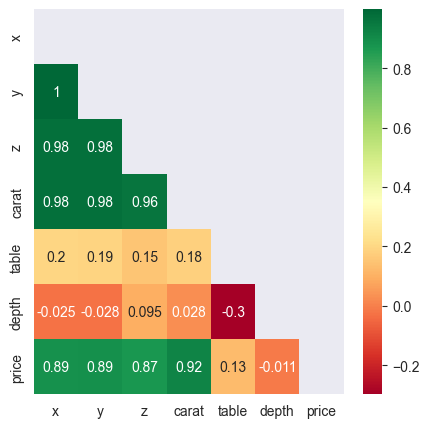

In [10]:
plt.figure(figsize = (5,5))
mask = np.triu(np.ones_like(diamonds[['x','y','z','carat','table','depth','price']].corr()))
sns.heatmap(diamonds[['x','y','z','carat','table','depth','price']].corr(),cmap="RdYlGn",mask = mask,annot=True)
plt.show()

Existe una medida alta de relación lineal entre los atributos 'carat' vs 'x', 'y' y 'z', y de los atributos 'price' vs 'carat', 'x', 'y' y 'z' (cercana a 1) pero una medida baja de relación respecto a los atributos 'table' y 'depth' (cercana a 0)

Ahora se analizarán gráficamente el atributo a predecir (price) en función de los demas atributos y categorías

In [157]:
# Atributos de entrada
X = diamonds.drop(['price'], axis=1)
# Atributo de salida
y = diamonds[['price']]

'carat' y 'depth' vs 'price'

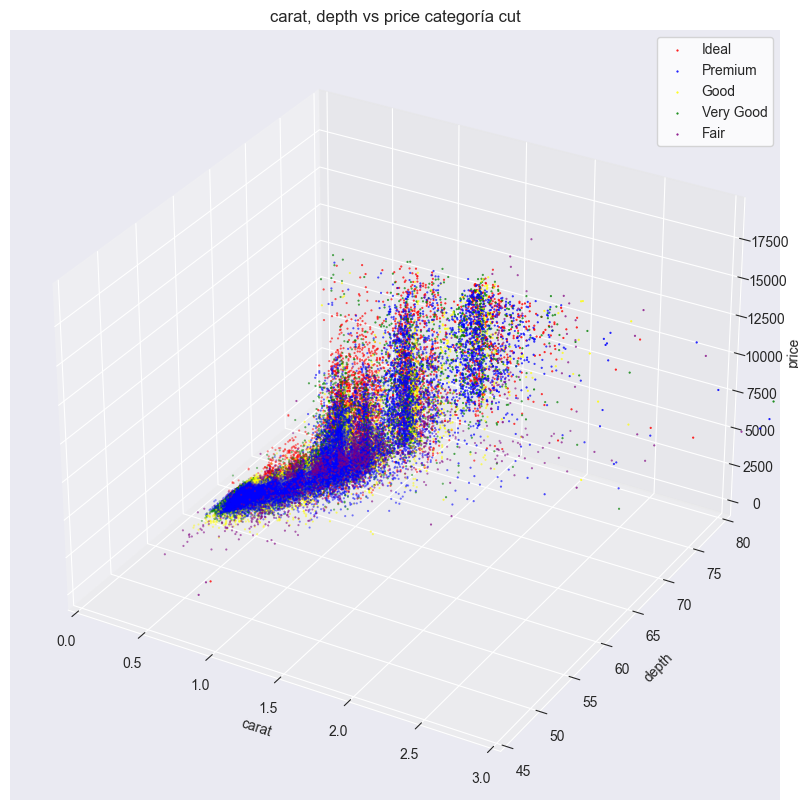

In [12]:
t_colores = ('red','blue','yellow','green','purple','brown','pink','gray')
# Figura con proyección 3D
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
sns.set_style("whitegrid")
axes.set_title('carat, depth vs price categoría cut')
axes.set(xlim=(0, 3), ylim=(45, 80))

for i, categoria in enumerate(X['cut'].unique()):
    axes.scatter3D(X['carat'][X['cut']==categoria],X['depth'][X['cut']==categoria],
               y[X['cut']==categoria],s=0.3,c=t_colores[i],label=categoria)

axes.set_xlabel('carat')
axes.set_ylabel('depth')
axes.set_zlabel('price')
plt.legend(loc='best')
plt.show()

'carat' y 'table' vs 'price'

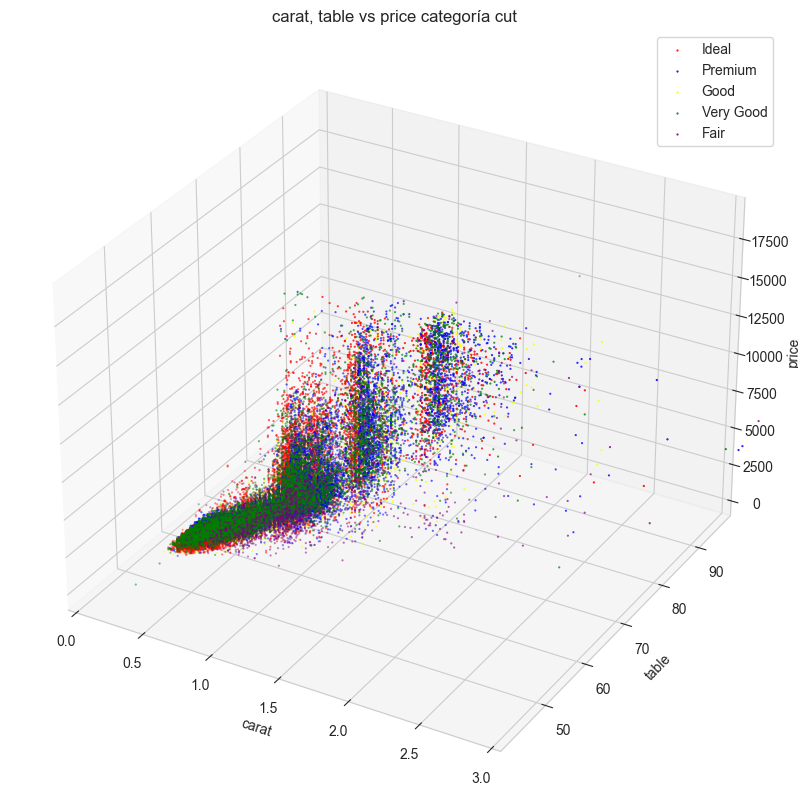

In [13]:
plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.set(xlim=(0, 3))
axes.set_title('carat, table vs price categoría cut')

for i, categoria in enumerate(X['cut'].unique()):
    axes.scatter3D(X['carat'][X['cut']==categoria],X['table'][X['cut']==categoria],
               y[X['cut']==categoria],s=0.3,c=t_colores[i],label=categoria)

axes.set_xlabel('carat')
axes.set_ylabel('table')
axes.set_zlabel('price')
plt.legend(loc='best')
plt.show()

Dado que se observan una nube de puntos se grafica la proyección de los puntos en el plano 'price' separados por categorías de 'cut'

In [14]:
print(X['cut'].unique())
print(sorted([(x,y) for x,y in zip((0,1,3,2,4),X['cut'].unique())],key=lambda x: x[0]))

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
[(0, 'Ideal'), (1, 'Premium'), (2, 'Very Good'), (3, 'Good'), (4, 'Fair')]


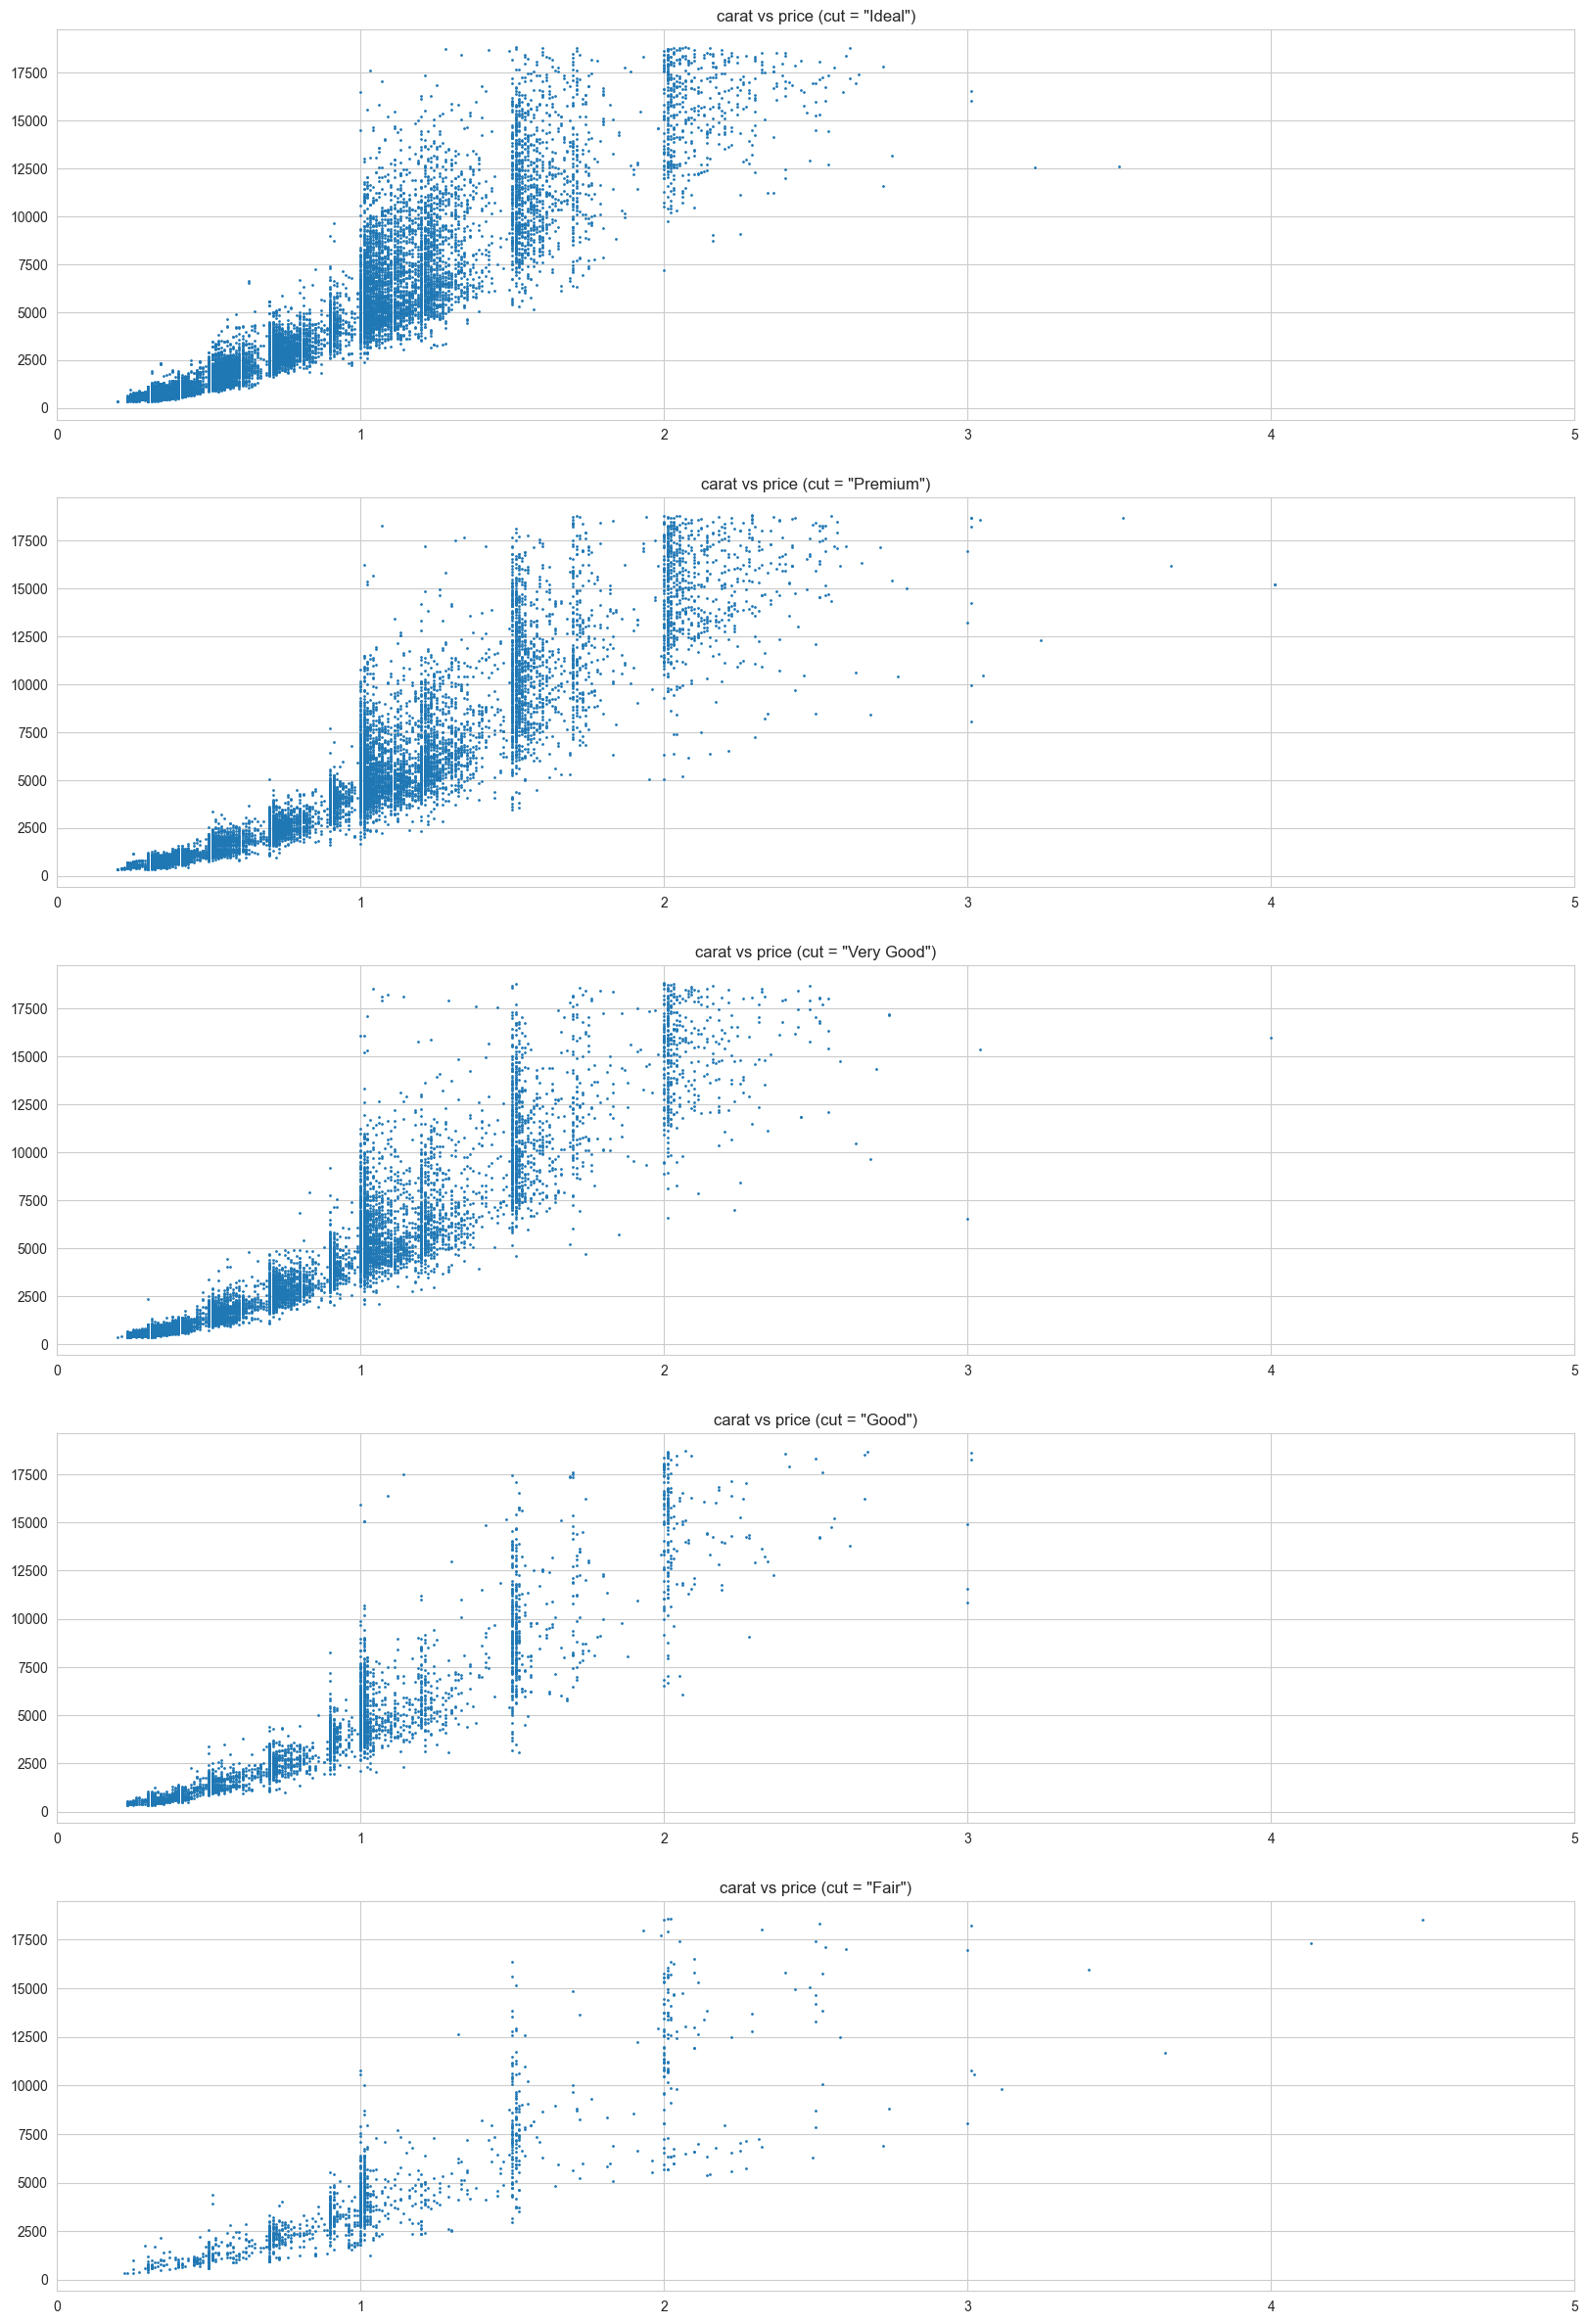

In [15]:
fig, axes = plt.subplots(X['cut'].unique().shape[0])
fig.set_size_inches(20, X['cut'].unique().shape[0]*6)
for i, categoria in sorted([(x,y) for x,y in zip((0,1,3,2,4),X['cut'].unique())],key=lambda x: x[0]):
    axes[i].set(xlim=(0, 5))
    axes[i].scatter(X['carat'][X['cut']==categoria], y[X['cut']==categoria], s=1)
    axes[i].set_title('carat vs price (cut = "'+categoria+'")')
plt.show()

Ahora separados por la categoría 'color'

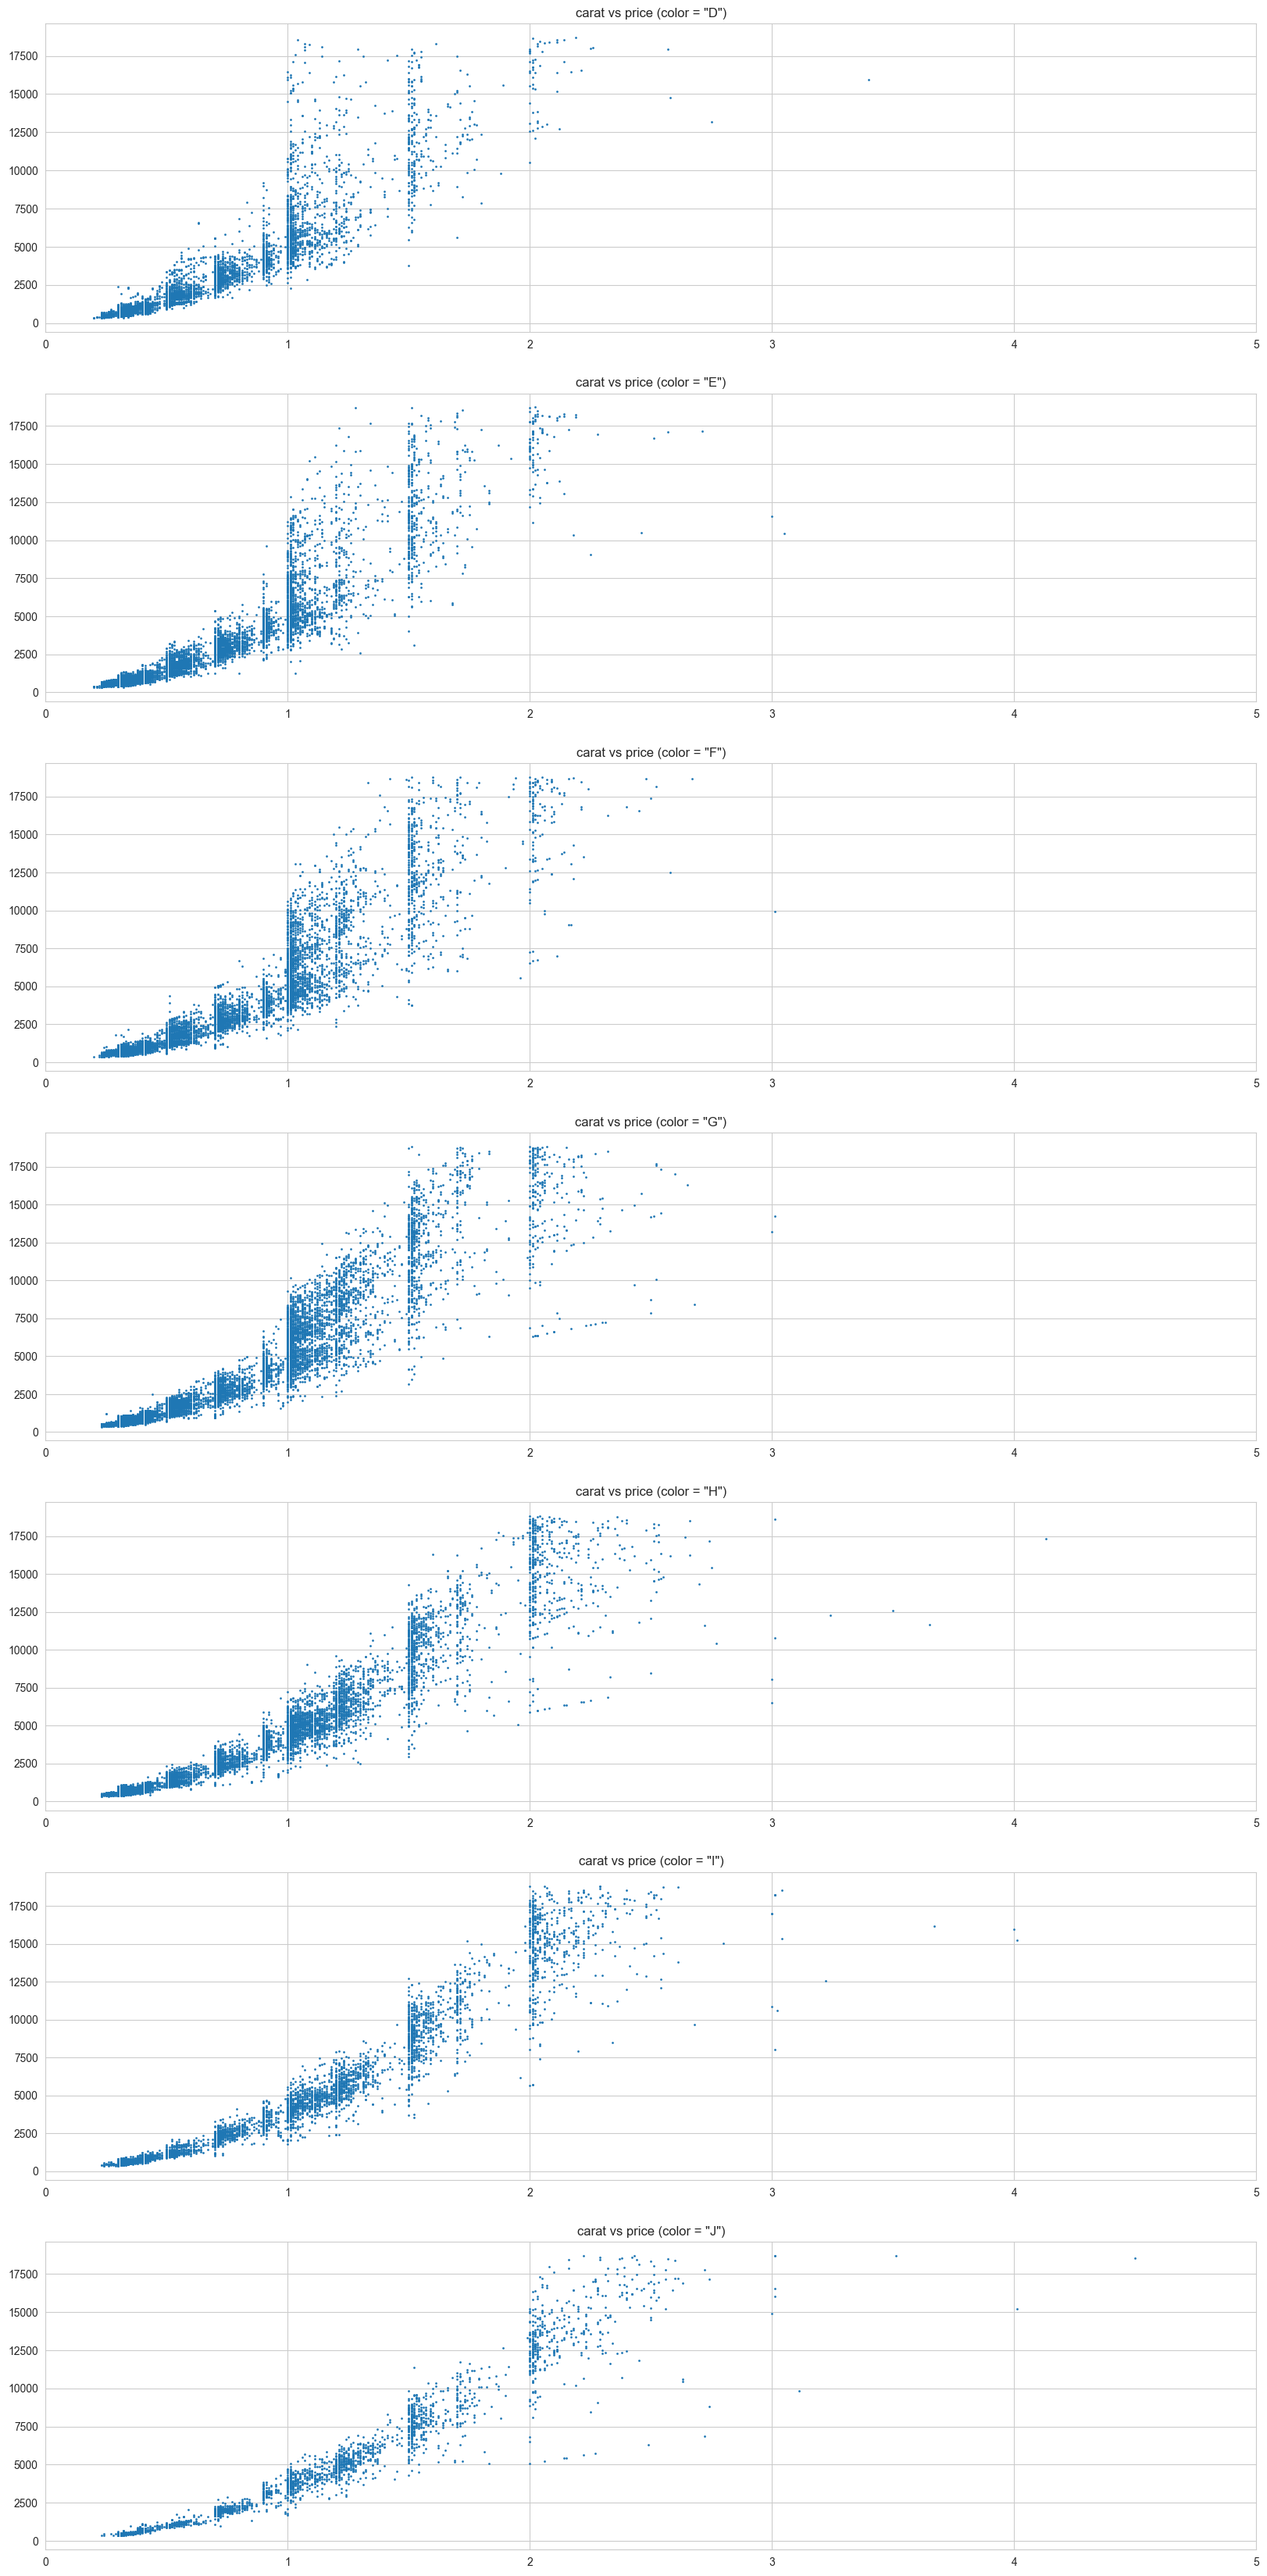

In [16]:
fig, axes = plt.subplots(X['color'].unique().shape[0])
fig.set_size_inches(20, X['color'].unique().shape[0]*6)
for i, categoria in enumerate(sorted(X['color'].unique())):
    axes[i].set(xlim=(0, 5))
    axes[i].scatter(X['carat'][X['color']==categoria], y[X['color']==categoria], s=1)
    axes[i].set_title('carat vs price (color = "'+categoria+'")')
plt.show()

Ahora separados por categoría 'clarity'

In [17]:
print(X['clarity'].unique())
print(sorted([(x,y) for x,y in zip((6,5,3,4,2,1,7,0),X['clarity'].unique())],key=lambda x: x[0]))

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
[(0, 'IF'), (1, 'VVS1'), (2, 'VVS2'), (3, 'VS1'), (4, 'VS2'), (5, 'SI1'), (6, 'SI2'), (7, 'I1')]


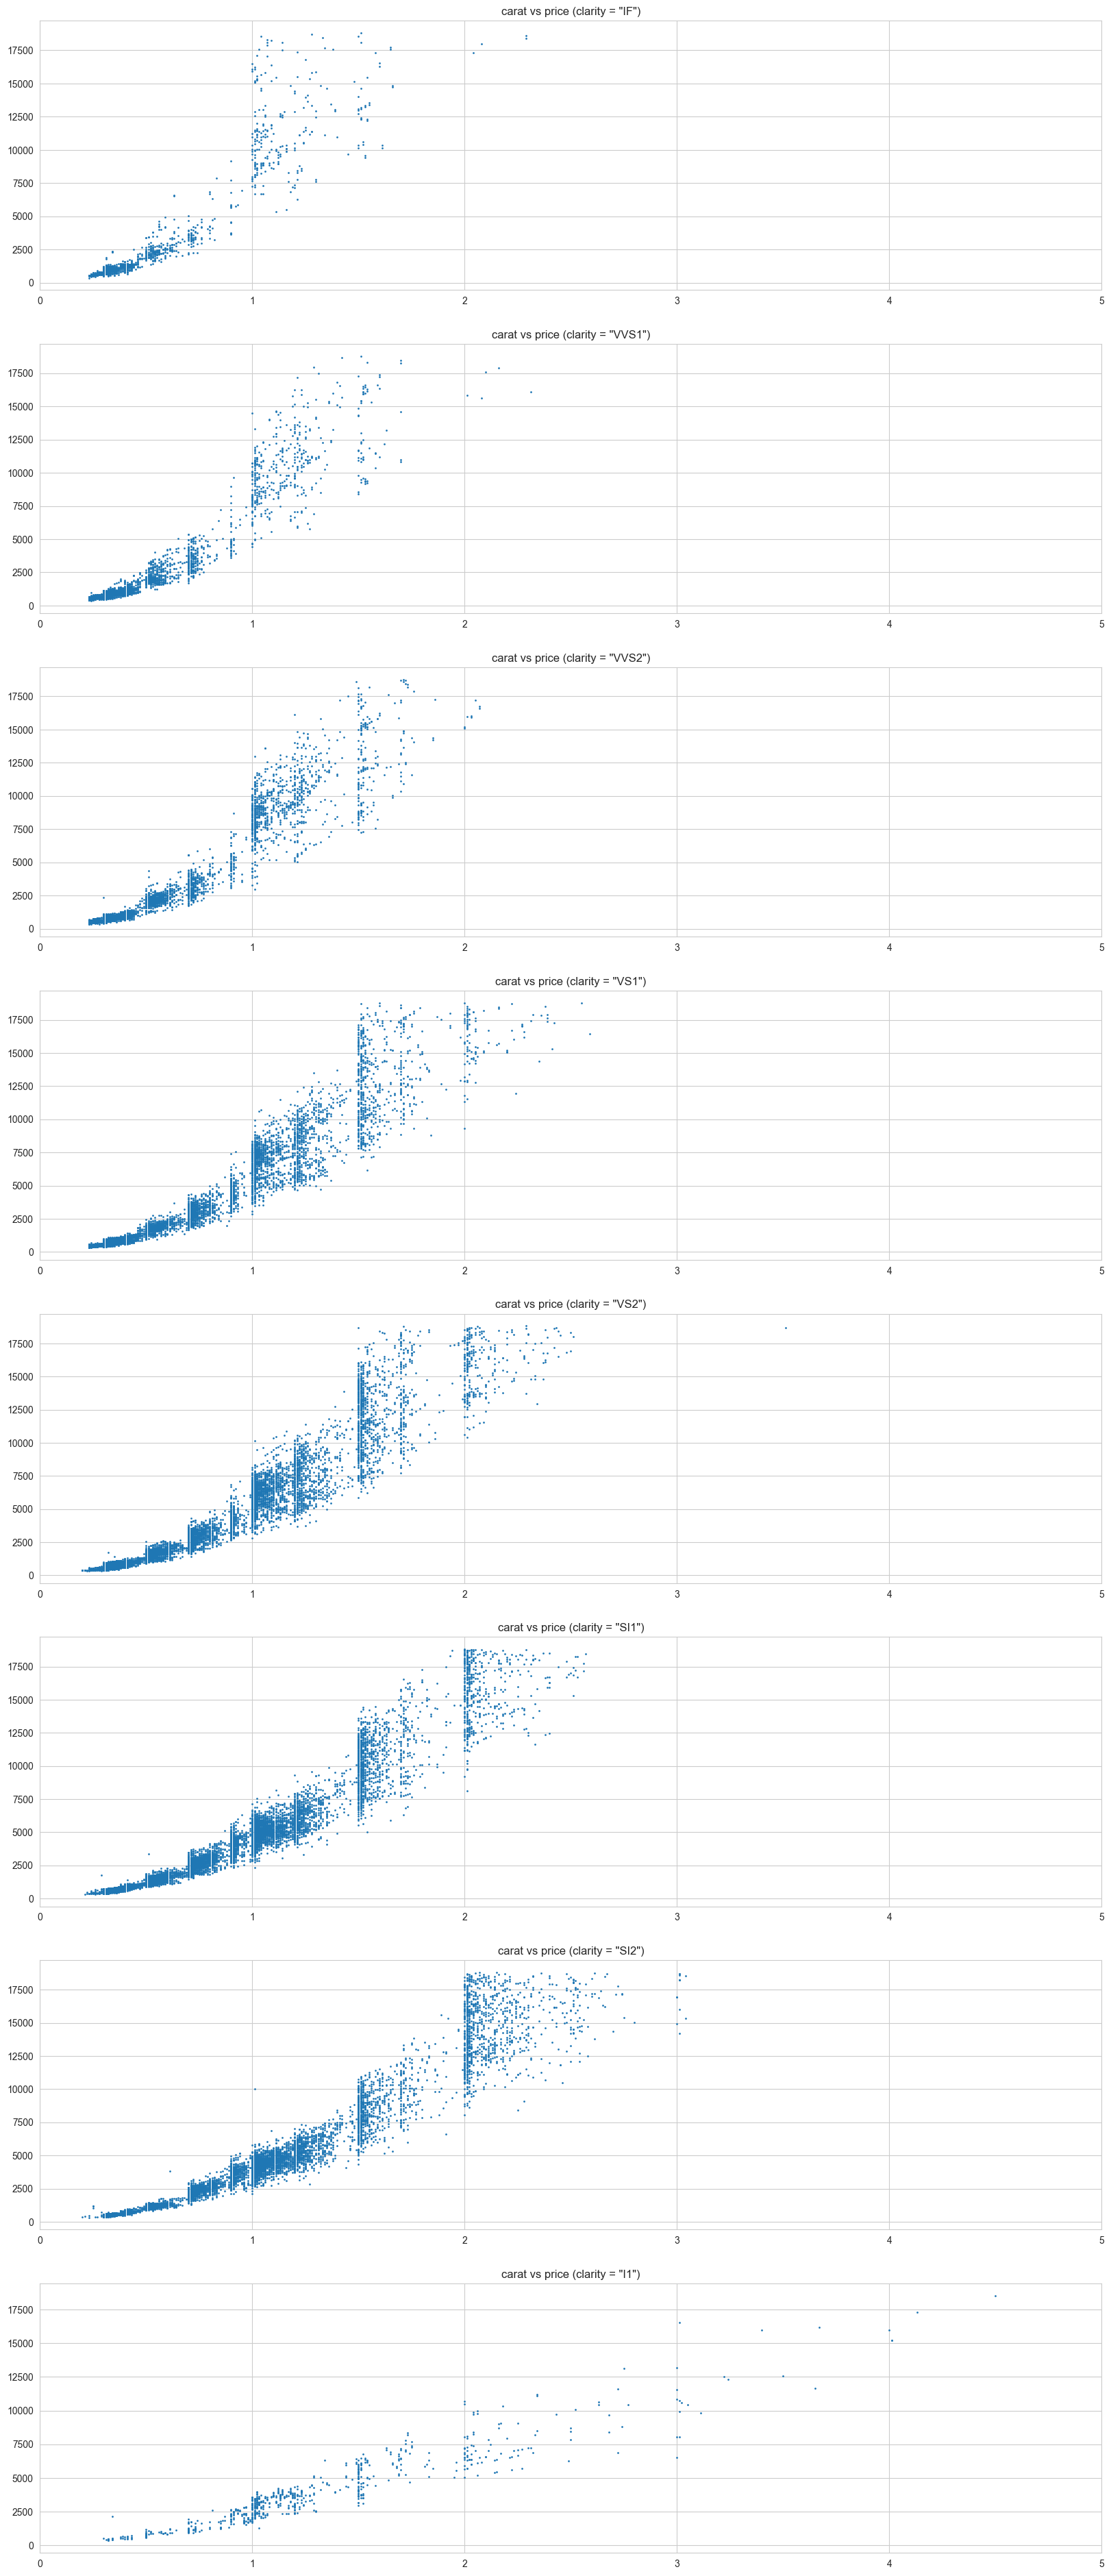

In [18]:
fig, axes = plt.subplots(X['clarity'].unique().shape[0])
fig.set_size_inches(20, X['clarity'].unique().shape[0]*6)
for i, categoria in sorted([(x,y) for x,y in zip((6,5,3,4,2,1,7,0),X['clarity'].unique())],key=lambda x: x[0]):
    axes[i].set(xlim=(0, 5))
    axes[i].scatter(X['carat'][X['clarity']==categoria], y[X['clarity']==categoria], s=1)
    axes[i].set_title('carat vs price (clarity = "'+categoria+'")')
plt.show()

Se realiza el procedimiento para el procesamiento de los datos y entrenamiento del modelo.

In [158]:
# Se procede a hacer la codificacion de los parametros categoricos mediante el preprocesamiento por OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X.select_dtypes(include=['object']))
enc.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

Se conforma un nuevo conjunto de datos de entrada con los datos numericos de X, los valores categoricos codificados por OneHotEncoder y se eliminan las columnas tipo object. Tener en cuenta que se re establecio el index de X para que coincidan con los index del array OneHot codificado, ya que al no coincidir los index puede tener como consecuencia filas con valores NaN, y como la variable a predecir (precio) tiene comportamiento exponencial se procede a realizar un ajuste logaritmico de la curva.

In [161]:
X = X.set_index(np.arange(X.shape[0])).merge(pd.DataFrame(enc.transform(X.select_dtypes(include=['object'])).toarray()),left_index=True, right_index=True, how='left').drop(X.select_dtypes(include=['object']),axis=1)
y = np.log(y)
# Se establecen las columnas con tipo de dato string, debido a que el modelo de regresion lineal no permite columnas de tipo de dato int
X.columns = X.columns.astype(str)

Se conforma el modelo dividiendo los datos en un grupo de entrenamiento y otro grupo de prueba

In [163]:
from sklearn.model_selection import ShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
train_idx, test_idx = next(sss.split(X, y))
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]


In [165]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression()
pipe = make_pipeline(regresion_lineal)

In [166]:

# Entrenar  el modelo
pipe.fit(X_train, y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [169]:
# Se evalua el resultado con el conjunto de prueba
from sklearn.metrics import mean_squared_error
y_predicted = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
r2 = regresion_lineal.score(X_train, y_train)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 0.03269295535899917
Raíz del Error Cuadrático Medio (RMSE) = 0.1808119336741886
Coeficiente de Determinación R2 = 0.9821564563429886


# **Conclusiones:**
##### El modelo de regresión lineal obtenido presenta un coeficiente de deteminación bastante cecano a 1 y un error cuadratico medio bastante bajo, lo que presenta un buen ajuste y precisión del modelo y, por tanto, una buena fiabilidad. Como observacion la prediccion/estimacion del modelo se reliza en funcion del logaritmo neperiano del precio final, por lo que sera necesario el calculo del antilogaritmo del mismo.